<a href="https://colab.research.google.com/github/abrodyyy/Hotel_Repo/blob/main/Hotel_ExploratoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import files
uploaded = files.upload()

Saving clean_hotel_df.csv to clean_hotel_df.csv


In [85]:
# Import our dependencies
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

# Imports for Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
# Import our input dataset
df = pd.read_csv('clean_hotel_df.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out


Data Inspection and Cleanup

In [86]:
df.shape

(118898, 25)

In [87]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [88]:
# Corelation matrix
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.291994,0.016412,-0.006127,-0.002631,0.024110,0.058381,0.004751,-0.032521,-0.085179,0.109922,-0.055493,-0.144659,0.054016,0.046199,-0.194796,-0.235643
lead_time,0.291994,1.000000,0.039924,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,-0.125091,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536
arrival_date_year,0.016412,0.039924,1.000000,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,0.010128,-0.119922,0.029800,0.031124,-0.056823,0.197857,-0.012661,0.108927
arrival_date_day_of_month,-0.006127,0.002320,-0.000590,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.006340,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082
stays_in_weekend_nights,-0.002631,0.083984,0.021669,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.087836,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669
stays_in_week_nights,0.024110,0.164783,0.031754,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.097994,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785
adults,0.058381,0.116799,0.029146,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.147494,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815
children,0.004751,-0.038335,0.054492,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.032990,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786
babies,-0.032521,-0.021149,-0.013183,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.008954,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601
is_repeated_guest,-0.085179,-0.125091,0.010128,-0.006340,-0.087836,-0.097994,-0.147494,-0.032990,-0.008954,1.000000,0.082376,0.423259,0.012164,-0.022322,-0.135388,0.077776,0.013151


In [89]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_day_of_month       118898 non-null  int64  
 6   stays_in_weekend_nights         118898 non-null  int64  
 7   stays_in_week_nights            118898 non-null  int64  
 8   adults                          118898 non-null  int64  
 9   children                        118898 non-null  float64
 10  babies                          118898 non-null  int64  
 11  meal                            118898 non-null  object 
 12  country         

In [91]:
# Check for missing values 
## The PMS assured no missing data exists in its database tables. However, in some categorical variables like Agent or Company, 
##“NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. 
## For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.
## https://www.sciencedirect.com/science/article/pii/S2352340918315191

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
dtype: int64

Exploratory Data Analysis (EDA)

How many cancelations are there per hotel type?

In [92]:
# Total City and Resort Bookings
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

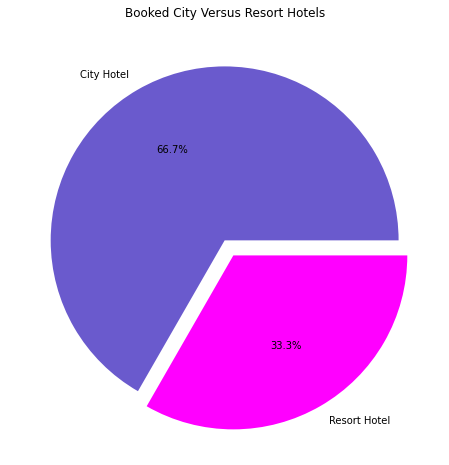

In [93]:
#Pie Chart that shows that there are more bookings for city hotels then resort hotels
colors = ["slateblue", "magenta"]
plt.subplots(figsize=(8, 8))
plt.pie(df.hotel.value_counts().values,
explode=[0,.1],
colors = colors,
labels=df.hotel.value_counts().index,
autopct='%.1f%%')
plt.title('Booked City Versus Resort Hotels')
plt.show()

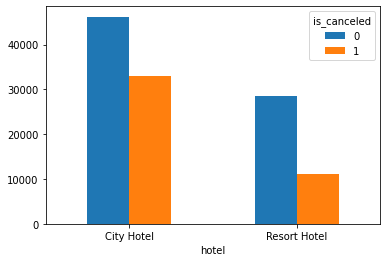

In [94]:
#shows that there is a higher cancellation for city hotels
# Creating crosstab
barplot= pd.crosstab(df.hotel,df.is_canceled)
 
# Creating barplot
pl = barplot.plot(kind="bar", stacked=False, rot=0)


In [95]:
# Total Bookings
total_bookings = len(df)
print(f"Total Bookings: {total_bookings:,}")

# Total Cancelations
total_cancelations = df["is_canceled"].sum()
total_cancel_percent = (total_cancelations/total_bookings) * 100

# Resort Cancelations
resort_cancel = df[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
resort_cancel_percent = (resort_cancel/total_cancelations) * 100

# City Cancelations
city_cancel = df[df["hotel"] == "City Hotel"]["is_canceled"].sum()
city_cancel_percent = (city_cancel/total_cancelations) * 100

print(f"Total Bookings Canceled: {total_cancelations:,} ({total_cancel_percent:.2f}% of Total Bookings)")
print(f"Resort Hotel Bookings Canceled: {resort_cancel:,} ({resort_cancel_percent:.2f}% of Total Cancelations)")
print(f"City Hotel Bookings Canceled: {city_cancel:,} ({city_cancel_percent:.2f}% of Total Cancelations)")

Total Bookings: 118,898
Total Bookings Canceled: 44,153 (37.14% of Total Bookings)
Resort Hotel Bookings Canceled: 11,077 (25.09% of Total Cancelations)
City Hotel Bookings Canceled: 33,076 (74.91% of Total Cancelations)


Which month has the most visitors? Which month had the most cancelations?

In [96]:
confirmed_df = df[df["is_canceled"]==0]
confirmed_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,0,0,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,0,0,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,0,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,0,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118893,City Hotel,0,23,2017,August,30,2,5,2,0.0,...,0,0,0,No Deposit,0,Transient,96.14,0,0,Check-Out
118894,City Hotel,0,102,2017,August,31,2,5,3,0.0,...,0,0,0,No Deposit,0,Transient,225.43,0,2,Check-Out
118895,City Hotel,0,34,2017,August,31,2,5,2,0.0,...,0,0,0,No Deposit,0,Transient,157.71,0,4,Check-Out
118896,City Hotel,0,109,2017,August,31,2,5,2,0.0,...,0,0,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [97]:
canceled_df = df[df["is_canceled"]==1]
canceled_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
8,Resort Hotel,1,85,2015,July,1,0,3,2,0.0,...,0,0,0,No Deposit,0,Transient,82.0,0,1,Canceled
9,Resort Hotel,1,75,2015,July,1,0,3,2,0.0,...,0,0,0,No Deposit,0,Transient,105.5,0,0,Canceled
10,Resort Hotel,1,23,2015,July,1,0,4,2,0.0,...,0,0,0,No Deposit,0,Transient,123.0,0,0,Canceled
27,Resort Hotel,1,60,2015,July,1,2,5,2,0.0,...,0,0,0,No Deposit,0,Transient,107.0,0,2,Canceled
31,Resort Hotel,1,96,2015,July,1,2,8,2,0.0,...,0,0,0,No Deposit,0,Transient,108.3,0,2,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109788,City Hotel,1,132,2017,April,25,0,0,0,0.0,...,0,0,1,No Deposit,0,Transient,0.0,0,3,Canceled
110863,City Hotel,1,4,2017,June,5,1,0,1,0.0,...,0,4,0,No Deposit,0,Transient,65.0,0,0,Canceled
111432,City Hotel,1,7,2017,May,31,0,1,1,0.0,...,0,1,0,No Deposit,0,Transient,65.0,0,0,Canceled
111433,City Hotel,1,6,2017,July,17,1,0,1,0.0,...,1,1,0,No Deposit,0,Transient,65.0,0,0,No-Show


In [98]:
confirmed_df['arrival_date_month'].value_counts()

August       8618
July         7892
May          7102
October      6867
March        6591
April        6533
June         6393
September    6367
February     5317
November     4632
December     4365
January      4068
Name: arrival_date_month, dtype: int64

In [99]:
canceled_df['arrival_date_month'].value_counts()

August       5234
July         4736
May          4677
June         4534
April        4512
October      4228
September    4100
March        3148
February     2695
December     2363
November     2120
January      1806
Name: arrival_date_month, dtype: int64

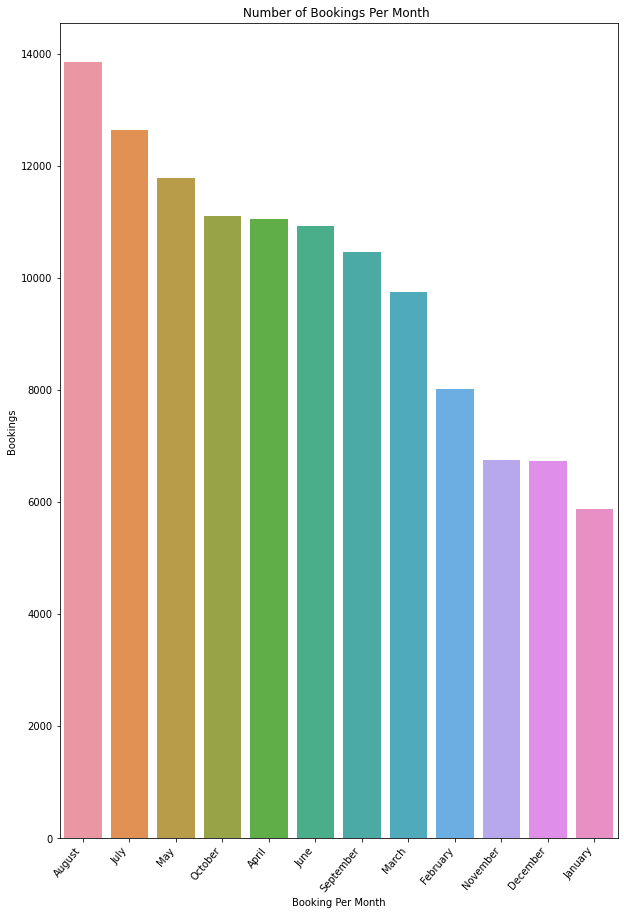

In [100]:
#like the data shows above the graph shows that august has the highest bookings per mopnth and that January has the lowest
plt.figure(figsize=(10,15))
sea.countplot(x='arrival_date_month',data=df,
order=df.arrival_date_month.value_counts().index)
plt.title('Number of Bookings Per Month ')
plt.xlabel('Booking Per Month')
plt.ylabel('Bookings')
plt.xticks(rotation=50,ha='right')
plt.show()

In [ ]:
#I was going to create a graph for the cancellations per month

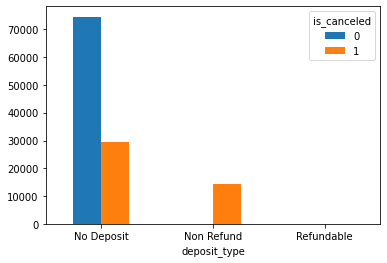

In [101]:
#Deposits and cancellations

# Creating crosstab
barplot= pd.crosstab(df.deposit_type,df.is_canceled)
 
# Creating barplot
pl = barplot.plot(kind="bar", stacked=False, rot=0)


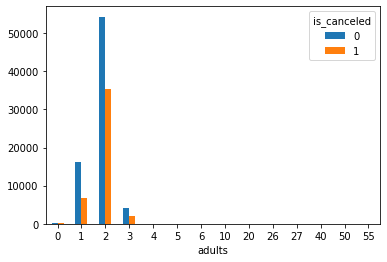

In [102]:

#shows that there is a higher cancellation when its only one or 2 adults verus 3 or more
# Creating crosstab
barplot= pd.crosstab(df.adults,df.is_canceled)
 
# Creating barplot
pl = barplot.plot(kind="bar", stacked=False, rot=0)

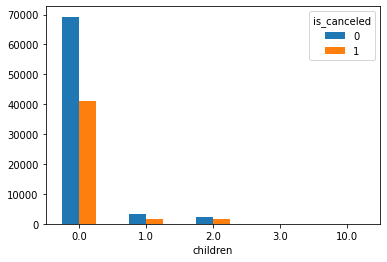

In [103]:
#shows that there is more cancellations with no children then with children
# Creating crosstab
barplot= pd.crosstab(df.children,df.is_canceled)
 
# Creating barplot
pl = barplot.plot(kind="bar", stacked=False, rot=0)

In [104]:
# Splitting Dataset into Resort and City type

# Resort 
resort_df = df.loc[df['hotel'] == 'Resort Hotel']

# City
city_df = df.loc[df['hotel'] == 'City Hotel']

In [105]:
# Cancelations by month from Resort 
resort_cancelations_month = resort_df.groupby(['arrival_date_month']).sum()['is_canceled']
resort_cancelations_month.sort_values(ascending=False)

arrival_date_month
August       1636
July         1430
April        1051
May          1024
June         1006
September     990
October       974
February      794
March         762
December      626
November      460
January       324
Name: is_canceled, dtype: int64

In [106]:
# Cancelations by month from City
city_cancelations_month = city_df.groupby(['arrival_date_month']).sum()['is_canceled']
city_cancelations_month.sort_values(ascending=False)

arrival_date_month
May          3653
August       3598
June         3528
April        3461
July         3306
October      3254
September    3110
March        2386
February     1901
December     1737
November     1660
January      1482
Name: is_canceled, dtype: int64

Possible questions:
What countries do the majority of guest come from?
How much do guests pay for a room per night?
How does the price per night vary over the year?
Which months have the highest cancellations
How long do people stay at the hotels?
Bookings by market segment
How many bookings were canceled?
How does the deposit type play a role in cancellations 
How does customer type play a role in cancellations
How reservation date plays a role in cancellations

How many bookings per market segment?